In [1]:
# import all libraries

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression as logrig
from sklearn.linear_model import LinearRegression as linrig
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale as mms
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer

In [2]:
# data preparation
 
df = pd.read_csv('D:\ml resources\ml data set\heart_data.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.isnull().sum() , df.shape

(male                 0
 age                  0
 education          105
 currentSmoker        0
 cigsPerDay          29
 BPMeds              53
 prevalentStroke      0
 prevalentHyp         0
 diabetes             0
 totChol             50
 sysBP                0
 diaBP                0
 BMI                 19
 heartRate            1
 glucose            388
 TenYearCHD           0
 dtype: int64,
 (4238, 16))

In [4]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [5]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
#df.dropna(how='any', inplace=True) # drop rows with any NaN values 

<AxesSubplot:>

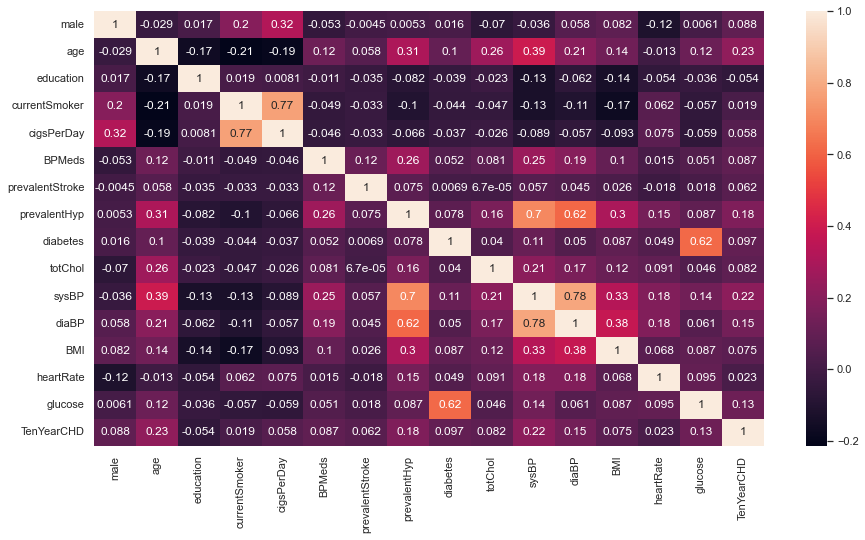

In [7]:
sb.set(rc = {'figure.figsize': (15,8)})
sb.heatmap(df.corr(),annot=True )

In [8]:
# create x and y variables for the model
class_col = 'target'
x = df.drop(['TenYearCHD'],axis = 1)
y = df['TenYearCHD']

In [9]:
dm = x 
# dm = StandardScaler().fit(dm1)
# y = StandardScaler.fit_transform(y)

In [10]:
x_train , x_test , y_train , y_test = tts(x,y,test_size = 0.3)

In [11]:
x_train.shape, y_train.shape

((2966, 15), (2966,))

In [12]:
print(y_test.unique())

from collections import Counter
Counter(y_train)

[0 1]


Counter({0: 2524, 1: 442})

In [13]:
xgb_class = xgb(max_depth=5, learning_rate=0.01, n_estimators=100)

In [14]:
xgb_class.fit(x_train,y_train)

D:\conda_python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:29:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
xgb_class.score(x_test,y_test)

0.8404088050314465

## use stackingCVclassifier to improve the accuracy of the ml model

# Use of pipeline

In [16]:
# use of pipeline 

catagory_col = [cnames for cnames in dm.columns if dm[cnames].nunique() < 10]
num_col = [cnames for cnames in dm.columns if cnames not in catagory_col]

numerical_transformer = SimpleImputer(strategy = 'constant')
catagorical_transformer = SimpleImputer(strategy = 'most_frequent')

process_pipeline = ColumnTransformer(
    transformers= [ ('num' , numerical_transformer, num_col) , ('cat' , catagorical_transformer , catagory_col)  ]
    ) 

model = logrig(solver='liblinear')
model2 = xgb()
model3 = linrig()

model_pipe = Pipeline(steps = [('preprocess' , process_pipeline) , ('model' , model)])


In [17]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['age', 'cigsPerDay',
                                                   'totChol', 'sysBP', 'diaBP',
                                                   'BMI', 'heartRate',
                                                   'glucose']),
                                                 ('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['male', 'education',
                                                   'currentSmoker', 'BPMeds',
                                                   'prevalentStroke',
                                                   'prevalentHyp',
                                                   'diabetes'])])),
                ('model', LogisticRe

In [18]:
model_pipe.score(x_test,y_test)

0.8427672955974843

In [19]:
mean_absolute_error(y_test,model_pipe.predict(x_test))

0.15723270440251572

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow

In [21]:
dm1 = df
dm1.dropna(how='any', inplace=True)
x = dm1.drop(['TenYearCHD'],axis = 1)
y = dm1['TenYearCHD']

In [22]:
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.3,random_state = 10)

In [23]:
ann_model = Sequential(layers=[
    Dense(units=1024,activation='relu',input_shape=[len(x.columns)]),
    Dense(units=512,activation='tanh'),
    Dense(1,activation='sigmoid')]
)
ann_model.compile(optimizer='adam',loss='MeanSquaredLogarithmicError', metrics=['accuracy'])

In [24]:
class mycallback (tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if(logs.get('accuracy')>0.98):
            print('\nReached 99%\ accuracy so cancelling training')
            self.model.stop_training = True

In [25]:

ann_model.fit(x_train, y_train ,epochs = 10,callbacks = mycallback())

Epoch 1/10
80/80 [==============================] - 2s 9ms/step - loss: 0.0717 - accuracy: 0.8503
Epoch 2/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0709 - accuracy: 0.8523
Epoch 3/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0708 - accuracy: 0.8523
Epoch 4/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0656 - accuracy: 0.8523
Epoch 5/10
80/80 [==============================] - 1s 8ms/step - loss: 0.0615 - accuracy: 0.8523
Epoch 6/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0610 - accuracy: 0.8523
Epoch 7/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0615 - accuracy: 0.8523
Epoch 8/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0609 - accuracy: 0.8523
Epoch 9/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0616 - accuracy: 0.8523
Epoch 10/10
80/80 [==============================] - 1s 7ms/step - loss: 0.0610 - accuracy: 0.8523


In [26]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              16384     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 541,697
Trainable params: 541,697
Non-trainable params: 0
_________________________________________________________________


In [27]:
ann_model.evaluate(x_test,y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.8368


[0.06597539782524109, 0.8368276953697205]

In [28]:
import pandas_profiling as pp

In [29]:
pp.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


In [ ]:
# from autoviz